In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [4]:
data = pd.read_csv('/content/adult.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


## Distribution of Different Categories

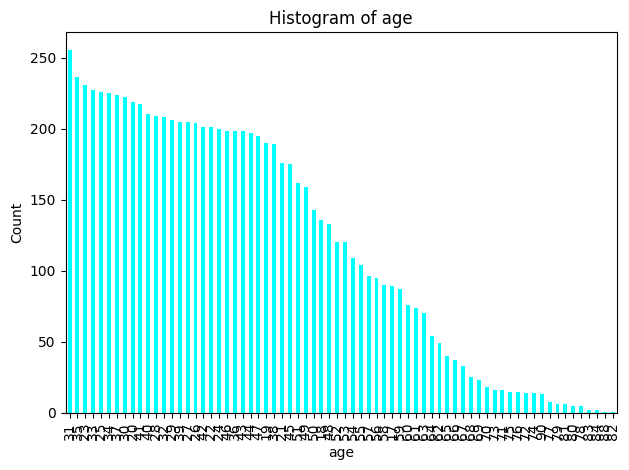

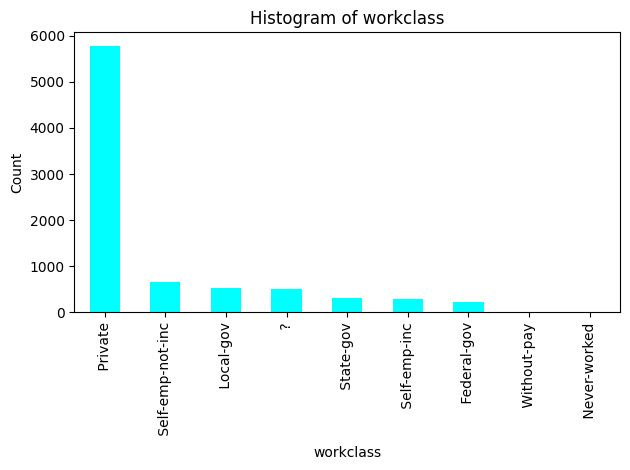

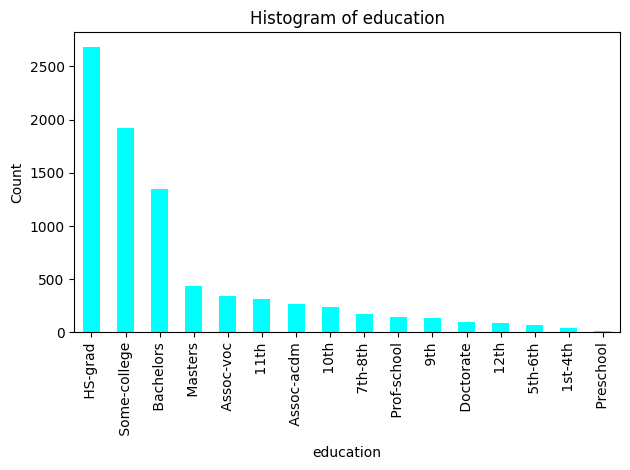

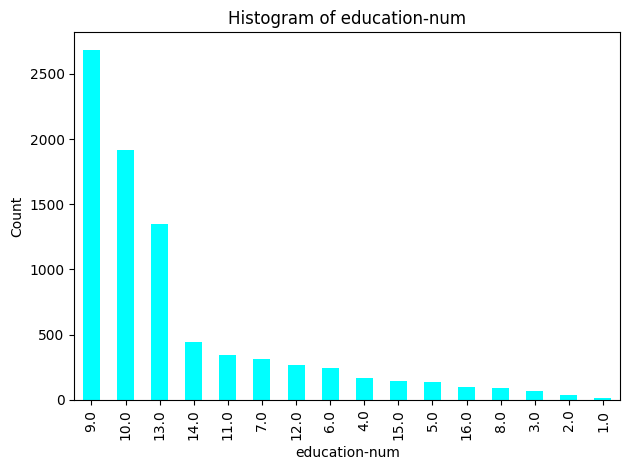

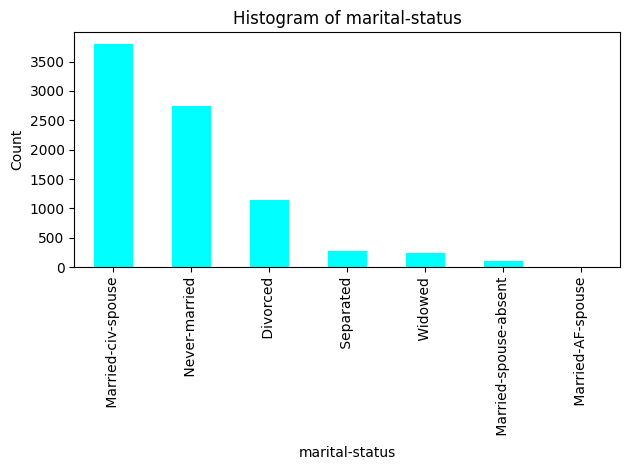

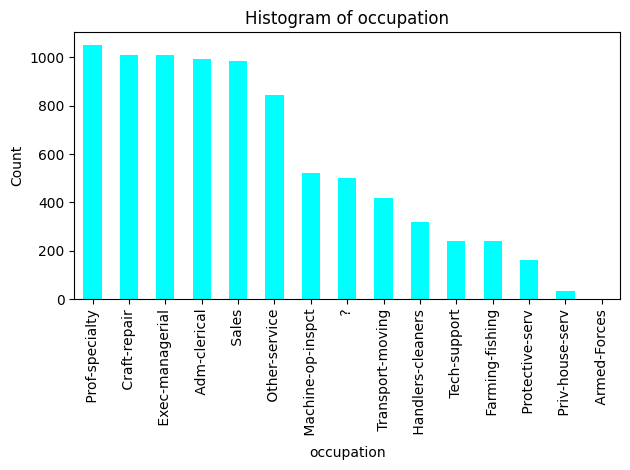

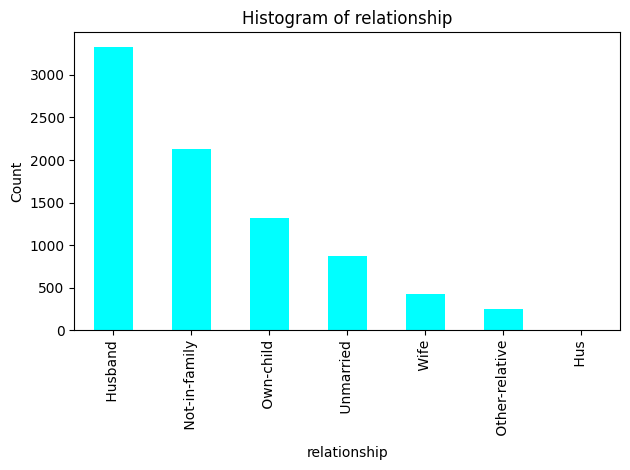

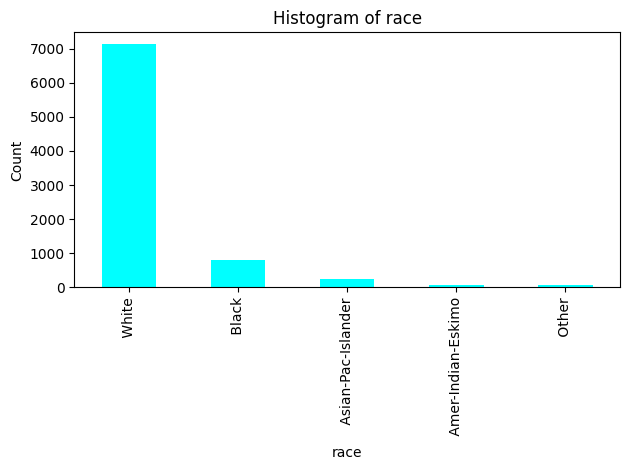

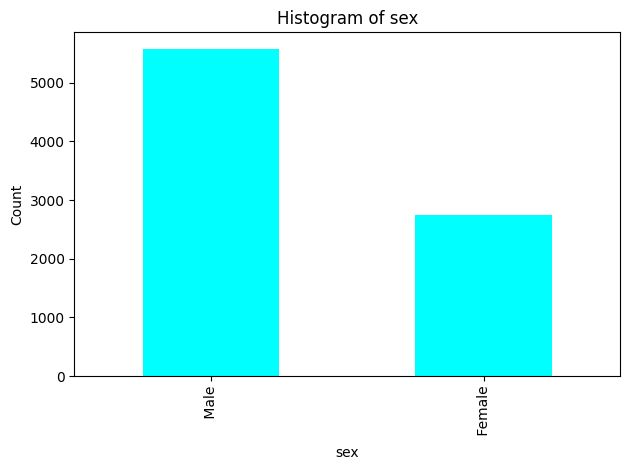

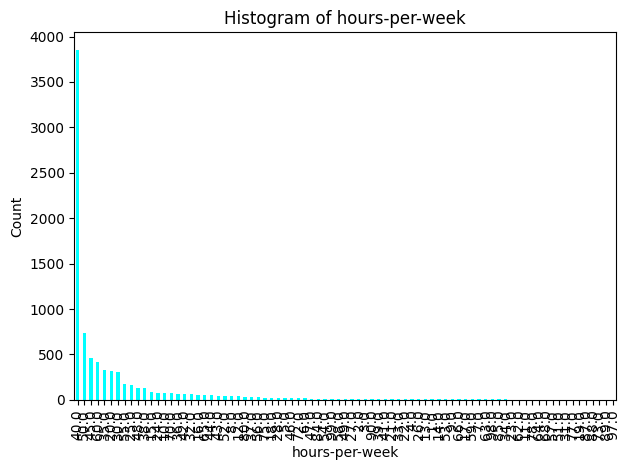

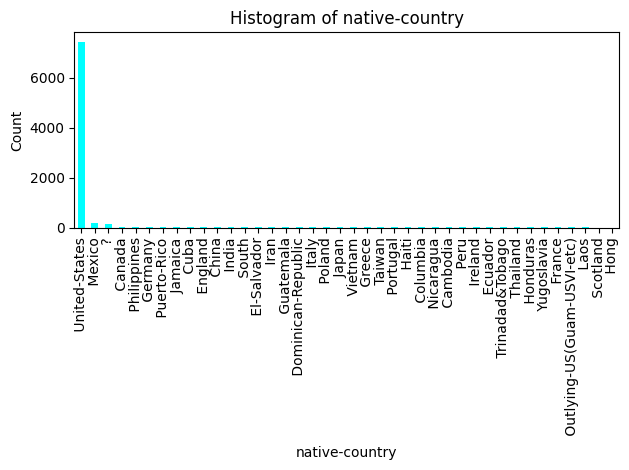

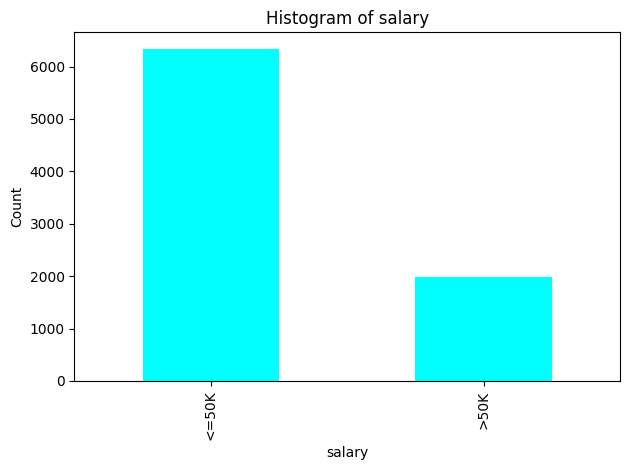

In [5]:
features = ['age', 'workclass', 'education', 'education-num','marital-status', 'occupation', 'relationship', 'race', 'sex', 'hours-per-week', 'native-country','salary']
for index, feature in enumerate(features):
    plt.figure(index + 1)
    data[feature].value_counts().plot(kind='bar', color='cyan')
    plt.title("Histogram of " + feature)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.tight_layout()

**Key observation**:
- Different races have different levels of representation in terms number of datapoints with a given race
- The levels of income distribution among a given race are different

- The fraction of the population that makes less than 50K is about 3 times the fraction of the
population that earns more than 50K.How would this affect the predictor trained on this data?



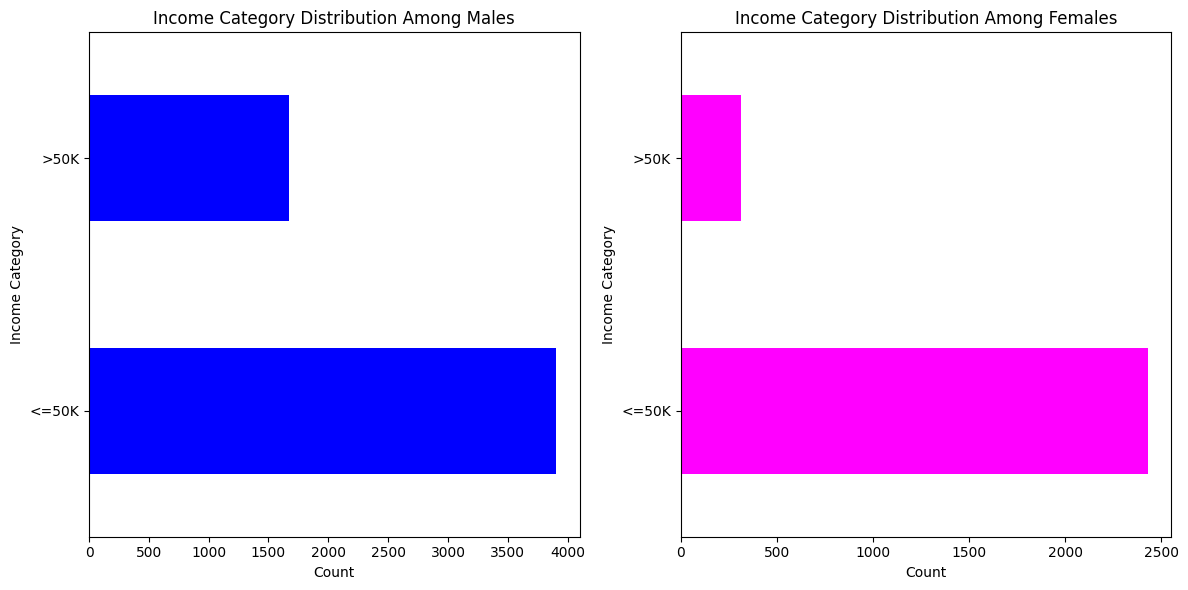

In [6]:
# Examining income category distribution among the male and female demographics
male_data = data[data.sex == ' Male']
female_data = data[data.sex == ' Female']
titles = ['Income Category Distribution Among Males', 'Income Category Distribution Among Females']

plt.figure(figsize=(12, 6))

# Plotting horizontal histogram for male data
plt.subplot(1, 2, 1)
male_data['salary'].value_counts().plot(kind='barh', color='blue')
plt.title(titles[0])
plt.xlabel('Count')
plt.ylabel('Income Category')

# Plotting horizontal histogram for female data
plt.subplot(1, 2, 2)
female_data['salary'].value_counts().plot(kind='barh', color='magenta')
plt.title(titles[1])
plt.xlabel('Count')
plt.ylabel('Income Category')

plt.tight_layout()
plt.show()



**Key observation:**
- The number of datapoints in the male population is considerably higher than the number of datapoints in the female category, exceeding it by more than 3 times in the higher income category.


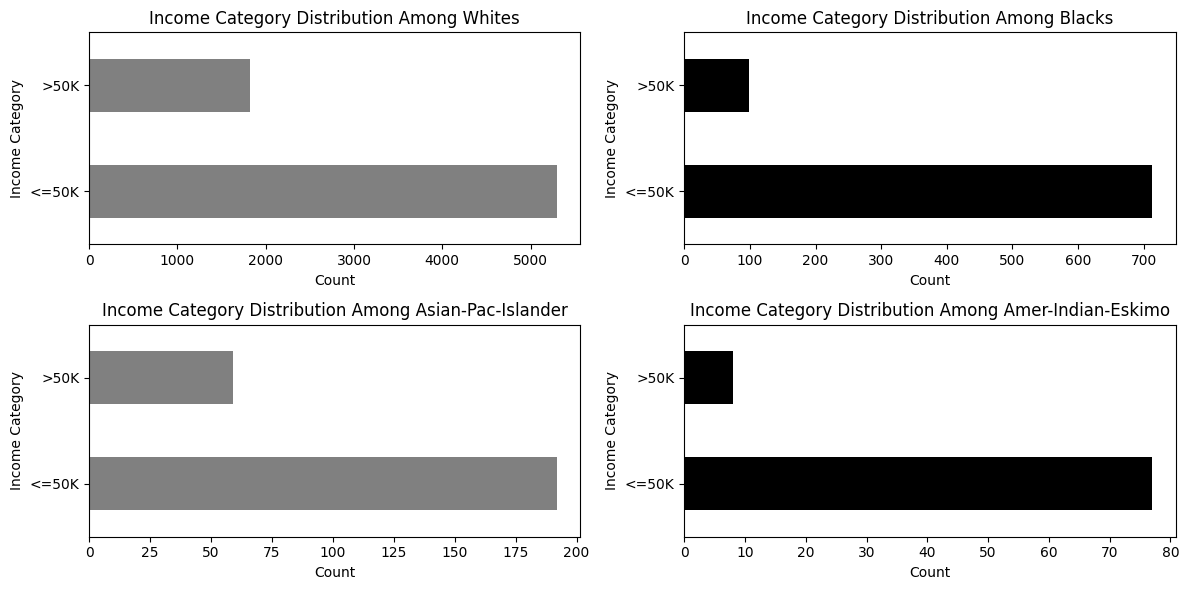

In [7]:
# Examining income category distribution among the male and female demographics
white_data = data[data.race == ' White']
black_data = data[data.race == ' Black']
asian_data = data[data.race == ' Asian-Pac-Islander']
amer_data = data[data.race == ' Amer-Indian-Eskimo']

titles = ['Income Category Distribution Among Whites', 'Income Category Distribution Among Blacks', 'Income Category Distribution Among Asian-Pac-Islander', 'Income Category Distribution Among Amer-Indian-Eskimo']

plt.figure(figsize=(12, 6))

# Plotting horizontal histogram for white data
plt.subplot(2, 2, 1)
white_data['salary'].value_counts().plot(kind='barh', color='gray')
plt.title(titles[0])
plt.xlabel('Count')
plt.ylabel('Income Category')

# Plotting horizontal histogram for black data
plt.subplot(2, 2, 2)
black_data['salary'].value_counts().plot(kind='barh', color='black')
plt.title(titles[1])
plt.xlabel('Count')
plt.ylabel('Income Category')

plt.subplot(2, 2, 3)
asian_data['salary'].value_counts().plot(kind='barh', color='gray')
plt.title(titles[2])
plt.xlabel('Count')
plt.ylabel('Income Category')

plt.subplot(2, 2, 4)
amer_data['salary'].value_counts().plot(kind='barh', color='black')
plt.title(titles[3])
plt.xlabel('Count')
plt.ylabel('Income Category')
plt.tight_layout()
plt.show()


# Preprocessing

In [8]:
# Create a new dataset to be modified
datav2 = data.copy()
datav2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


### Drop missing values

In [9]:
features_with_question_marks = []

# Iterate over each column in the DataFrame
for feature in datav2.columns:
    # Check if any value in the column is '?' or NaN
    if any(value == ' ?' or pd.isnull(value) for value in datav2[feature].unique()):
        features_with_question_marks.append(feature)  # Add the feature to the list if it contains '?' or NaN

print(features_with_question_marks)

# Replace ' ?' with NaN values
datav2.replace({' ?': np.nan}, inplace=True)

# Remove rows with any missing values
datav2.dropna(how='any', inplace=True)

['workclass', 'occupation', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salary']


## Encoding for categorical variables

In [10]:
datav2[datav2['native-country'] == ' United-States'].shape

(6984, 15)

In [11]:
# Map 'native-country' column values to 'US' and 'Non-US' using apply and lambda function
datav2['native-country'] = datav2['native-country'].apply(lambda x: 'US' if x == ' United-States' else 'Non-US')
US_LABEL, NON_US_LABEL = (0, 1)
# Map labels to integers using map function
datav2['native-country'] = datav2['native-country'].map({'US': US_LABEL, 'Non-US': NON_US_LABEL}).astype(int)

# Mapping values in 'salary' column
HIGH_SALARY_LABEL, LOW_SALARY_LABEL = (0, 1)
datav2['salary'] = datav2['salary'].replace({'<=50K': LOW_SALARY_LABEL, '>50K': HIGH_SALARY_LABEL})

# Mapping values in 'sex' column
FEMALE_LABEL, MALE_LABEL = (0, 1)
datav2['sex'] = datav2['sex'].replace({' Male': MALE_LABEL, ' Female': FEMALE_LABEL})

In [12]:
list(set(datav2['marital-status']))

[' Married-civ-spouse',
 ' Separated',
 ' Married-AF-spouse',
 ' Married-spouse-absent',
 ' Never-married',
 ' Widowed',
 ' Divorced']

In [13]:
# Change marital status to single or couple
# Define the replacements
replacements = {
    ' Divorced': 'Single',
    ' Married-spouse-absent': 'Single',
    ' Never-married': 'Single',
    ' Separated': 'Single',
    ' Widowed': 'Single',
    ' Married-AF-spouse': 'Couple',
    ' Married-civ-spouse': 'Couple'
}

# Replace values using the defined dictionary
datav2['marital-status'] = datav2['marital-status'].replace(replacements)

# Print the first few rows to verify the changes
print(datav2.head())


   age          workclass    fnlwgt   education  education-num marital-status  \
0   39          State-gov   77516.0   Bachelors           13.0         Single   
1   50   Self-emp-not-inc   83311.0   Bachelors           13.0         Couple   
2   38            Private  215646.0     HS-grad            9.0         Single   
3   53            Private  234721.0        11th            7.0         Couple   
4   28            Private  338409.0   Bachelors           13.0         Couple   

           occupation    relationship    race  sex  capital-gain  \
0        Adm-clerical   Not-in-family   White    1        2174.0   
1     Exec-managerial         Husband   White    1           0.0   
2   Handlers-cleaners   Not-in-family   White    1           0.0   
3   Handlers-cleaners         Husband   Black    1           0.0   
4      Prof-specialty            Wife   Black    0           0.0   

   capital-loss  hours-per-week  native-country  salary  
0           0.0            40.0               

In [14]:
COUPLE_STATUS_LABEL, SINGLE_STATUS_LABEL = (0, 1)
mapping = {'Couple': COUPLE_STATUS_LABEL, 'Single': SINGLE_STATUS_LABEL}
datav2['marital-status'] = datav2['marital-status'].map(mapping)

In [15]:
# Define the relationship mapping dictionary
rel_map = {
    ' Unmarried': 0,
    ' Wife': 1,
    ' Husband': 2,
    ' Not-in-family': 3,
    ' Own-child': 4,
    ' Other-relative': 5
}

# Replace values in the 'relationship' column using the defined dictionary
datav2['relationship'] = datav2['relationship'].replace(rel_map)


In [16]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the 'relationship' column
encoded_relationship = encoder.fit_transform(datav2[['relationship']])

# Create a DataFrame from the encoded values
encoded_df = pd.DataFrame(encoded_relationship, columns=encoder.get_feature_names_out(['relationship']))

# Concatenate the encoded DataFrame with the original DataFrame
datav2 = pd.concat([datav2, encoded_df], axis=1)

# Drop the original 'relationship' column
datav2.drop(columns=['relationship'], inplace=True)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [17]:
from sklearn.preprocessing import OneHotEncoder

# Define the race mapping dictionary
race_map = {
    ' White': 0,
    ' Amer-Indian-Eskimo': 1,
    ' Asian-Pac-Islander': 2,
    ' Black': 3,
    ' Other': 4
}

# Map values in the 'race' column to integers
datav2['race'] = datav2['race'].map(race_map)

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the 'race' column
encoded_race = encoder.fit_transform(datav2[['race']])

# Create a DataFrame from the encoded values
encoded_df = pd.DataFrame(encoded_race, columns=encoder.get_feature_names_out(['race']))

# Concatenate the encoded DataFrame with the original DataFrame
datav2 = pd.concat([datav2, encoded_df], axis=1)

# Drop the original 'race' column
datav2.drop(columns=['race'], inplace=True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [18]:
print(datav2.head())

    age          workclass    fnlwgt   education  education-num  \
0  39.0          State-gov   77516.0   Bachelors           13.0   
1  50.0   Self-emp-not-inc   83311.0   Bachelors           13.0   
2  38.0            Private  215646.0     HS-grad            9.0   
3  53.0            Private  234721.0        11th            7.0   
4  28.0            Private  338409.0   Bachelors           13.0   

   marital-status          occupation  sex  capital-gain  capital-loss  ...  \
0             1.0        Adm-clerical  1.0        2174.0           0.0  ...   
1             0.0     Exec-managerial  1.0           0.0           0.0  ...   
2             1.0   Handlers-cleaners  1.0           0.0           0.0  ...   
3             0.0   Handlers-cleaners  1.0           0.0           0.0  ...   
4             0.0      Prof-specialty  0.0           0.0           0.0  ...   

   relationship_2  relationship_3  relationship_4  relationship_5  race_0.0  \
0             0.0             1.0          

In [19]:
datav2.drop(columns=['race_nan'], inplace=True)

In [20]:
import numpy as np

# Define conditions and corresponding categories
conditions = [
    (datav2['workclass'] == ' Federal-gov') | (datav2['workclass'] == ' Local-gov') | (datav2['workclass'] == ' State-gov'),
    (datav2['workclass'] == ' Private'),
    (datav2['workclass'] == ' Self-emp-inc') | (datav2['workclass'] == ' Self-emp-not-inc')
]
categories = ['govt', 'private', 'self_employed']

# Apply np.select() to create the new 'workclass' column
datav2['workclass'] = np.select(conditions, categories, default='without_pay')

# One-hot encode the 'workclass' column
datav2 = pd.get_dummies(datav2, columns=['workclass'])


In [21]:
# Create an instance of OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit the encoder on the 'occupation' column and transform it
occupation_encoded = encoder.fit_transform(datav2[['occupation']])

# Retrieve the feature names from the categories of the original column
categories = encoder.categories_[0]
feature_names = [f'occupation_{cat}' for cat in categories]

# Create a DataFrame from the encoded data
occupation_encoded_df = pd.DataFrame(occupation_encoded, columns=feature_names)

# Concatenate the original DataFrame with the encoded DataFrame
datav2 = pd.concat([datav2, occupation_encoded_df], axis=1)

# Drop the original 'occupation' column
datav2.drop(columns=['occupation'], inplace=True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [22]:
print(datav2.head())

    age    fnlwgt   education  education-num  marital-status  sex  \
0  39.0   77516.0   Bachelors           13.0             1.0  1.0   
1  50.0   83311.0   Bachelors           13.0             0.0  1.0   
2  38.0  215646.0     HS-grad            9.0             1.0  1.0   
3  53.0  234721.0        11th            7.0             0.0  1.0   
4  28.0  338409.0   Bachelors           13.0             0.0  0.0   

   capital-gain  capital-loss  hours-per-week  native-country  ...  \
0        2174.0           0.0            40.0             0.0  ...   
1           0.0           0.0            13.0             0.0  ...   
2           0.0           0.0            40.0             0.0  ...   
3           0.0           0.0            40.0             0.0  ...   
4           0.0           0.0            40.0             1.0  ...   

   occupation_ Handlers-cleaners  occupation_ Machine-op-inspct  \
0                            0.0                            0.0   
1                            0

In [23]:
datav2.drop(columns=['occupation_nan'], inplace=True)

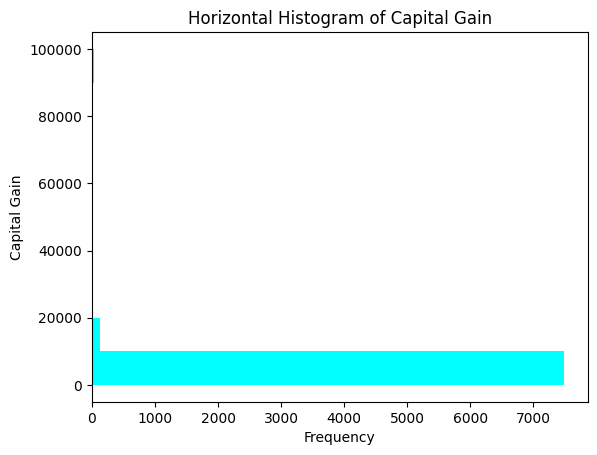

In [24]:
plt.hist(datav2['capital-gain'], bins=None, orientation='horizontal', color='cyan')
plt.xlabel('Frequency')
plt.ylabel('Capital Gain')
plt.title('Horizontal Histogram of Capital Gain')
plt.show()

In [25]:
datav2['capital-gain'] = np.where(datav2['capital-gain'] > 0, 1, 0)
print(datav2.head())

    age    fnlwgt   education  education-num  marital-status  sex  \
0  39.0   77516.0   Bachelors           13.0             1.0  1.0   
1  50.0   83311.0   Bachelors           13.0             0.0  1.0   
2  38.0  215646.0     HS-grad            9.0             1.0  1.0   
3  53.0  234721.0        11th            7.0             0.0  1.0   
4  28.0  338409.0   Bachelors           13.0             0.0  0.0   

   capital-gain  capital-loss  hours-per-week  native-country  ...  \
0             1           0.0            40.0             0.0  ...   
1             0           0.0            13.0             0.0  ...   
2             0           0.0            40.0             0.0  ...   
3             0           0.0            40.0             0.0  ...   
4             0           0.0            40.0             1.0  ...   

   occupation_ Farming-fishing  occupation_ Handlers-cleaners  \
0                          0.0                            0.0   
1                          0.0    

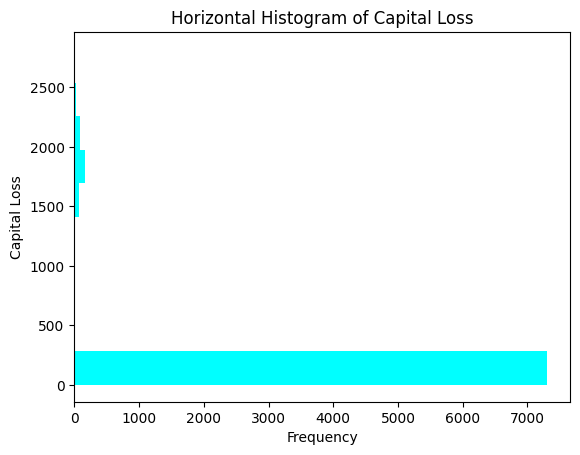

In [26]:
plt.hist(datav2['capital-loss'], bins=None, orientation='horizontal', color='cyan')
plt.xlabel('Frequency')
plt.ylabel('Capital Loss')
plt.title('Horizontal Histogram of Capital Loss')
plt.show()

In [27]:
# Use np.where to set values of 'capital-gain' based on conditions
datav2['capital-loss'] = np.where(datav2['capital-loss'] > 0, 1, 0)

# Display the modified DataFrame
print(datav2.head())

    age    fnlwgt   education  education-num  marital-status  sex  \
0  39.0   77516.0   Bachelors           13.0             1.0  1.0   
1  50.0   83311.0   Bachelors           13.0             0.0  1.0   
2  38.0  215646.0     HS-grad            9.0             1.0  1.0   
3  53.0  234721.0        11th            7.0             0.0  1.0   
4  28.0  338409.0   Bachelors           13.0             0.0  0.0   

   capital-gain  capital-loss  hours-per-week  native-country  ...  \
0             1             0            40.0             0.0  ...   
1             0             0            13.0             0.0  ...   
2             0             0            40.0             0.0  ...   
3             0             0            40.0             0.0  ...   
4             0             0            40.0             1.0  ...   

   occupation_ Farming-fishing  occupation_ Handlers-cleaners  \
0                          0.0                            0.0   
1                          0.0    

# Model Trained on Data with bias (without bias mitigation)

In [28]:
from sklearn.preprocessing import StandardScaler

continuous_features = ['age', 'fnlwgt', 'education-num', 'hours-per-week']
X = datav2[continuous_features]
scaler = StandardScaler()
datav2[continuous_features] = scaler.fit_transform(X)
datav2.head()

,age,fnlwgt,education,education-num,marital-status,sex,capital-gain,capital-loss,hours-per-week,native-country,...,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving
0,0.048897,-1.061460,Bachelors,1.143060,1.0,1.0,1,0,-0.090075,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.889866,-1.007011,Bachelors,1.143060,0.0,1.0,0,0,-2.369814,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.027554,0.236392,HS-grad,-0.439401,1.0,1.0,0,0,-0.090075,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.119221,0.415619,11th,-1.230631,0.0,1.0,0,0,-0.090075,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.792071,1.389858,Bachelors,1.143060,0.0,0.0,0,0,-0.090075,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [29]:
datav2 = datav2.drop(['education'], axis=1)

In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

shuffled_datav2 = datav2.sample(frac=1).reset_index(drop=True)
shuffled_datav2.dropna(inplace=True)
X = shuffled_datav2.drop(['salary'], axis=1)
y = shuffled_datav2['salary']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
model = SVC()
model.fit(x_train, y_train)
prediction = model.predict(x_test)

In [31]:
from sklearn.metrics import accuracy_score

test_df = pd.concat([x_test.reset_index(drop=True), pd.Series(y_test, name='salary'), pd.Series(prediction, name='pred')], axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, prediction)

# Calculate whether prediction is accurate or not
test_df['accurate'] = test_df['salary'] == test_df['pred']

print("Accuracy:", accuracy)

Accuracy: 0.8356840620592384



# Evaluating the gender bias in  predictions


In [32]:
def evaluate_gender_performance(results_df, print_stats=False):
    def printline():
        if print_stats:
            print('-------------------------------------------------')

    def _print(*args, **kwargs):
        if print_stats:
            print(*args, **kwargs)

    summaries = {}
    overall_accuracy = results_df.accurate.mean()
    summaries['accuracy_overall'] = overall_accuracy
    _print("\n1. Overall Accuracy:", overall_accuracy, "\n")
    printline()

    # Accuracy across gender
    _print("\n2. Accuracy Across Gender:\n")
    for gender in [(FEMALE_LABEL, "Female"), (MALE_LABEL, "Male")]:
        rows = results_df[results_df.sex == gender[0]]
        accuracy_for_gender = rows.accurate.mean()
        summaries['accuracy_' + gender[1]] = accuracy_for_gender
        _print(f"Accuracy for {gender[1]}: {accuracy_for_gender:.2f}\n")
    printline()

    _print("\n3. Positive Rates:\n")
    # High income rate given gender
    for gender in [(FEMALE_LABEL, "Female"), (MALE_LABEL, "Male")]:
        rows = results_df[results_df.sex == gender[0]]
        positive_rate_for_gender = (rows['pred'] == HIGH_SALARY_LABEL).mean()
        summaries['positive_rate_' + gender[1]] = positive_rate_for_gender
        _print(f"Positive rate for {gender[1]}: {positive_rate_for_gender:.2f}\n")
    printline()

    _print("\n4. Negative Rates:\n")
    # Low income rate given gender
    for gender in [(FEMALE_LABEL, "Female"), (MALE_LABEL, "Male")]:
        rows = results_df[results_df.sex == gender[0]]
        negative_rate_for_gender = (rows['pred'] == LOW_SALARY_LABEL).mean()
        summaries['negative_rate_' + gender[1]] = negative_rate_for_gender
        _print(f"Negative rate for {gender[1]}: {negative_rate_for_gender:.2f}\n")
    printline()

    _print("\n5. True Positive and True Negative Rates:\n")
    for index, gender in enumerate([(FEMALE_LABEL, "Female"), (MALE_LABEL, "Male")]):
        _print(f"\n{5 + (index+1)*0.1}. True Positive and Negative Rates on Gender = {gender[1]}:\n")
        rows = results_df[results_df.sex == gender[0]]
        high_income = rows[rows.salary == HIGH_SALARY_LABEL]
        low_income = rows[rows.salary == LOW_SALARY_LABEL]

        true_positive_rate = high_income.accurate.mean()
        true_negative_rate = low_income.accurate.mean()
        summaries['true_positive_rate_' + gender[1]] = true_positive_rate
        summaries['true_negative_rate_' + gender[1]] = true_negative_rate

        _print(f"True Positive Rate on {gender[1]}: {true_positive_rate:.2f}\n")
        _print(f"True Negative Rate on {gender[1]}: {true_negative_rate:.2f}\n")
        printline()

    printline()

    return summaries


In [33]:
def plot_comparisons_groups(approaches, accuracy_results, title, fignum=1, rotation='horizontal', labels=["Male", "Female"]):

    indices = list(range(len(approaches)))
    colors = ['orange', 'blue']
    width = 0.35  # Width of the bars

    fig, ax = plt.subplots()

    for i in range(len(labels)):
        ax.bar([index + i*width for index in indices], accuracy_results[i], width, label=labels[i], color=colors[i])

    if labels:
        ax.legend()

    plt.xticks([index + width/2 for index in indices], approaches, rotation=rotation)
    plt.title(title)

    plt.show()

def model_summary(model_name, title, summary):
    gender_metrics = ["accuracy", "positive_rate", "negative_rate", "true_positive_rate", "true_negative_rate"]
    model_summaries = []

    for metric in gender_metrics:
        male_metric = summary.get(metric + "_Male", 0)
        female_metric = summary.get(metric + "_Female", 0)
        new_summary = {"accuracy_Male": male_metric, "accuracy_Female": female_metric}
        model_summaries.append(new_summary)
    feature="accuracy"

    male_values = [summary[feature + '_Male'] for summary in model_summaries]
    female_values = [summary[feature + '_Female'] for summary in model_summaries]
    gender_metric = [male_values, female_values]

    plot_comparisons_groups(gender_metrics, gender_metric, title, rotation='vertical')



In [34]:
summary = evaluate_gender_performance(test_df, print_stats=True)



1. Overall Accuracy: 0.05952380952380952 

-------------------------------------------------

2. Accuracy Across Gender:

Accuracy for Female: 0.11

Accuracy for Male: 0.11

-------------------------------------------------

3. Positive Rates:

Positive rate for Female: 0.07

Positive rate for Male: 0.22

-------------------------------------------------

4. Negative Rates:

Negative rate for Female: 0.93

Negative rate for Male: 0.78

-------------------------------------------------

5. True Positive and True Negative Rates:


5.1. True Positive and Negative Rates on Gender = Female:

True Positive Rate on Female: 0.05

True Negative Rate on Female: 1.00

-------------------------------------------------

5.2. True Positive and Negative Rates on Gender = Male:

True Positive Rate on Male: 0.25

True Negative Rate on Male: 0.82

-------------------------------------------------
-------------------------------------------------


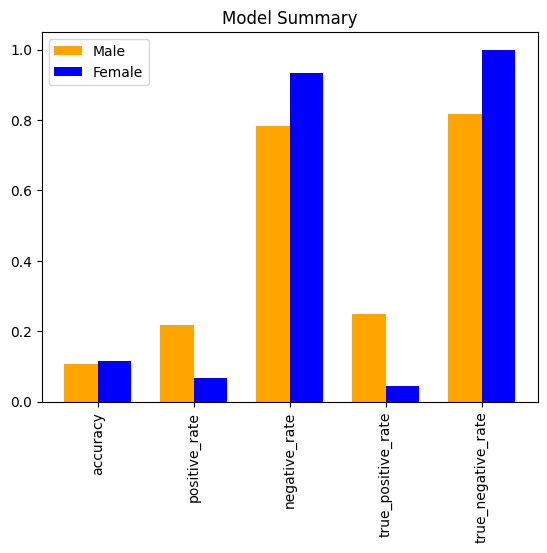

In [35]:
model_summary("SVM_with_bias", "Model Summary", summary)


# Bias mitigation Techniques

In [36]:
def evaluate_predictor_performance(predictions, x_test, y_test):
    testdata = x_test.copy()
    testdata['salary'] = y_test
    testdata['pred'] = pd.Series(predictions, index=x_test.index)
    testdata['accurate'] = (testdata['pred'] == testdata['salary'])
    return evaluate_gender_performance(testdata)

## Bias Mitigation by dataset balancing (resampling)

### Equal number of datapoints



balance the dataset by drawing equal number of samples from the male and female demographics.

In [37]:
datav3 = datav2.copy()
datav3.head()

,age,fnlwgt,education-num,marital-status,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,...,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving
0,0.048897,-1.061460,1.143060,1.0,1.0,1,0,-0.090075,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.889866,-1.007011,1.143060,0.0,1.0,0,0,-2.369814,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.027554,0.236392,-0.439401,1.0,1.0,0,0,-0.090075,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.119221,0.415619,-1.230631,0.0,1.0,0,0,-0.090075,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.792071,1.389858,1.143060,0.0,0.0,0,0,-0.090075,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [38]:
males = datav3[datav3['sex'] == MALE_LABEL]
females = datav3[datav3['sex'] == FEMALE_LABEL]

    # Sample an equal number of males and females
num_samples = min(females.shape[0], males.shape[0])
sampled_males = males.sample(n=num_samples).reset_index(drop=True)

    # Combine sampled males and all females
combined = pd.concat([sampled_males, females]).sample(frac=1).reset_index(drop=True)
combined.dropna(inplace=True)

    # Split features and labels
X = combined.drop(["salary"], axis=1)
y = combined["salary"]

    # Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
x_train.shape, x_test.shape


((3426, 38), (1143, 38))

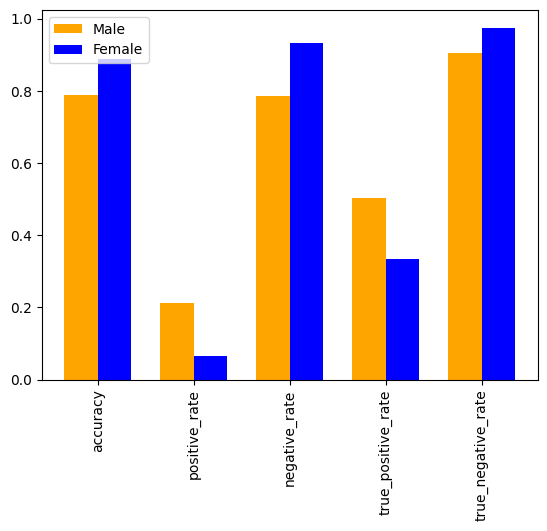

In [39]:
predictor = SVC()
predictor.fit(x_train, y_train)
predictions=predictor.predict(x_test)
testdata = x_test.copy()
testdata['salary'] = y_test
testdata['pred'] = pd.Series(predictions, index=x_test.index)
testdata['accurate'] = (testdata['pred'] == testdata['salary'])
approach_2= evaluate_gender_performance(testdata)
model_summary("MLP, equal_datapoints", "", approach_2)

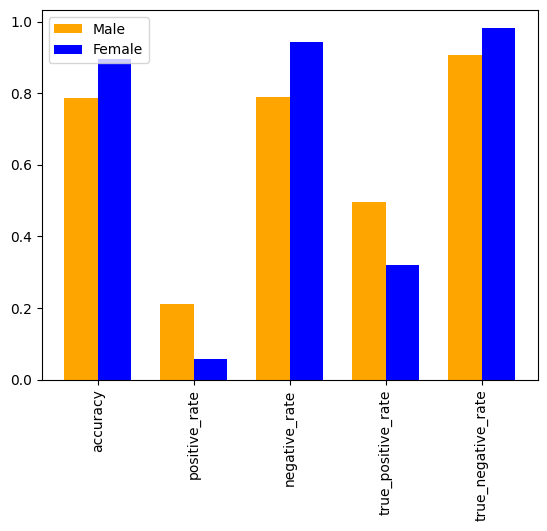

In [40]:
predictor = SVC()
predictor.fit(x_train.drop(['sex'], axis=1), y_train)
testdata = x_test.copy()
testdata['salary'] = y_test
predictions=predictor.predict(x_test.drop(['sex'], axis=1))
testdata['pred'] = pd.Series(predictions, index=x_test.index)
testdata['accurate'] = (testdata['pred'] == testdata['salary'])
approach_2_blind= evaluate_gender_performance(testdata)
model_summary("MLP, equal_datapoints_blind", "", approach_2_blind)

### Equal number of datapoints per demographic in each category

draw an equal number of data points from the subset of male individuals with a high income, male individuals with a low income, female individuals with a high income and female individuals with a low income

In [41]:
from sklearn.model_selection import train_test_split

male_high_salary = datav3[(datav3['sex'] == MALE_LABEL) & (datav3['salary'] == HIGH_SALARY_LABEL)]
male_low_salary = datav3[(datav3['sex'] == MALE_LABEL) & (datav3['salary'] == LOW_SALARY_LABEL)]
female_high_salary = datav3[(datav3['sex'] == FEMALE_LABEL) & (datav3['salary'] == HIGH_SALARY_LABEL)]
female_low_salary = datav3[(datav3['sex'] == FEMALE_LABEL) & (datav3['salary'] == LOW_SALARY_LABEL)]

# Find the smallest number of data points among all categories
smallest_category_size = min(len(male_high_salary), len(male_low_salary), len(female_high_salary), len(female_low_salary))

# Sample the data points from each category to match the size of the smallest category
sampled_male_high = male_high_salary.sample(n=smallest_category_size).reset_index(drop=True)
sampled_male_low = male_low_salary.sample(n=smallest_category_size).reset_index(drop=True)
sampled_female_high = female_high_salary.sample(n=smallest_category_size).reset_index(drop=True)
sampled_female_low = female_low_salary.sample(n=smallest_category_size).reset_index(drop=True)

combined_data = pd.concat([sampled_male_high, sampled_male_low, sampled_female_high, sampled_female_low]).sample(frac=1).reset_index(drop=True)
combined_data.dropna(inplace=True)
X = combined_data.drop(["salary"], axis=1)
y = combined_data["salary"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


In [42]:
predictor = SVC()
predictor.fit(x_train, y_train)
predictions = predictor.predict(x_test)

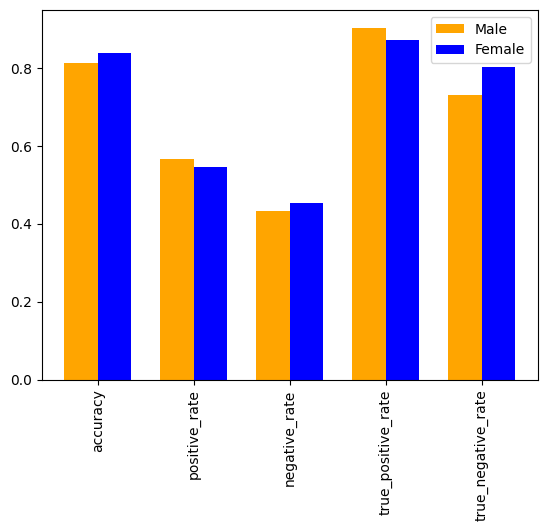

In [43]:
testdata = x_test.copy()
testdata['salary'] = y_test
testdata['pred'] = pd.Series(predictions, index=x_test.index)
testdata['accurate'] = (testdata['pred'] == testdata['salary'])
approach_3= evaluate_gender_performance(testdata)
model_summary("equal_datapoints_per_category", "", approach_3)

**Equal datapoints, gender_unaware**

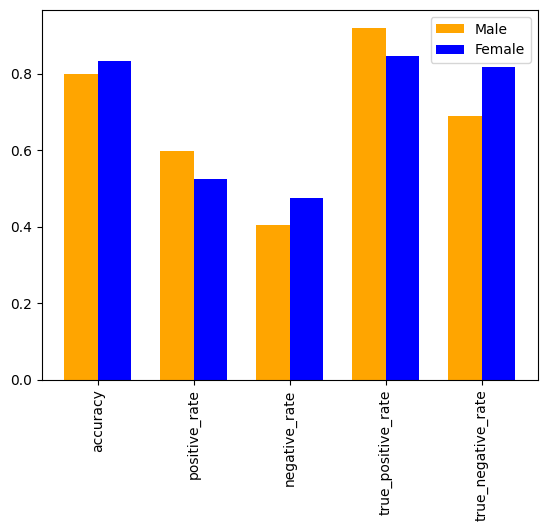

In [44]:
predictor = SVC()
predictor.fit(x_train.drop(['sex'], axis=1), y_train)
predictions = predictor.predict(x_test.drop(['sex'], axis=1))
testdata = x_test.copy()
testdata['salary'] = y_test
testdata['pred'] = pd.Series(predictions, index=x_test.index)
testdata['accurate'] = (testdata['pred'] == testdata['salary'])
approach_3_blind= evaluate_gender_performance(testdata)
model_summary("equal_datapoints_per_category", "", approach_3_blind)

### IV.2.3 Equal ratios instead of equal number of datapoints

In this section, we balance the dataset by preserving the ratio of the the size of the population in a given demographic with a given income level in a way that maximizes the number of datapoints.

In [45]:
from sklearn.model_selection import train_test_split

males = datav3[datav3['sex'] == MALE_LABEL]
females = datav3[datav3['sex'] == FEMALE_LABEL]

male_high_salary = males[males['salary'] == HIGH_SALARY_LABEL]
male_low_salary = males[males['salary'] == LOW_SALARY_LABEL]

female_high_salary = females[females['salary'] == HIGH_SALARY_LABEL]
female_low_salary = females[females['salary'] == LOW_SALARY_LABEL]

# Calculate the ratio of male_high to male_low
ratio = float(male_high_salary.shape[0]) / float(male_low_salary.shape[0])
print("Ratio is", ratio)

# Adjust the number of female_low samples based on the ratio
n_female_high = female_high_salary.shape[0]
n_female_low = int(n_female_high / ratio)

# Sample female_low data
sampled_female_low = female_low_salary.sample(n=n_female_low).reset_index(drop=True)

# Keep male_low, male_high, female_high, and the sampled female_low
balanced_data = pd.concat([male_low_salary, male_high_salary, female_high_salary, sampled_female_low]).sample(frac=1).reset_index(drop=True)
balanced_data.dropna(inplace=True)
# Split features and labels
X = balanced_data.drop(["salary"], axis=1)
y = balanced_data["salary"]

# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


Ratio is 0.4456491520711704


In [46]:
predictor = SVC()
predictor.fit(x_train, y_train)
predictions = predictor.predict(x_test)

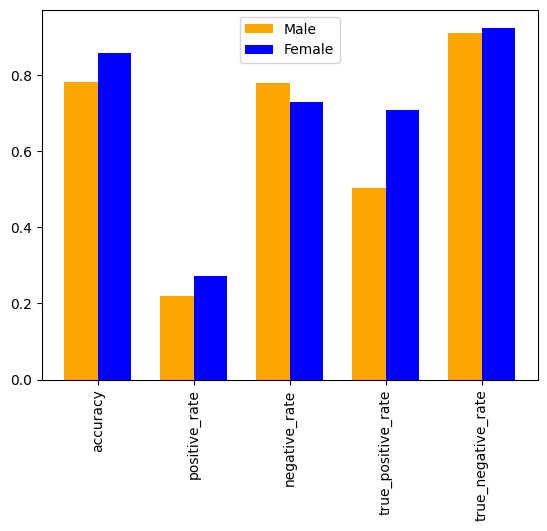

In [47]:
testdata = x_test.copy()
testdata['salary'] = y_test
testdata['pred'] = pd.Series(predictions, index=x_test.index)
testdata['accurate'] = (testdata['pred'] == testdata['salary'])
approach_4 = evaluate_gender_performance(testdata)
model_summary("equal_ratios", "", approach_4)

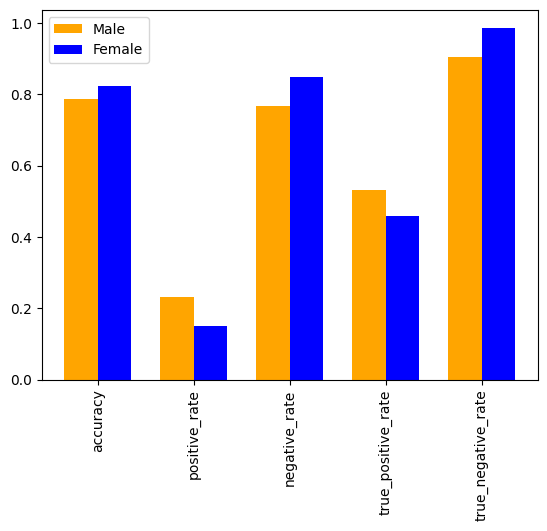

In [48]:
predictor = SVC()
predictor.fit(x_train.drop(['sex'], axis=1), y_train)
predictions = predictor.predict(x_test.drop(['sex'], axis=1))
testdata = x_test.copy()
testdata['salary'] = y_test
testdata['pred'] = pd.Series(predictions, index=x_test.index)
testdata['accurate'] = (testdata['pred'] == testdata['salary'])
approach_4_blind = evaluate_gender_performance(testdata)
model_summary("equal_ratios_blind", "", approach_4_blind)

## Bias mitigation by data augmentation (generating new data)
## (Counterfactual augmentation)

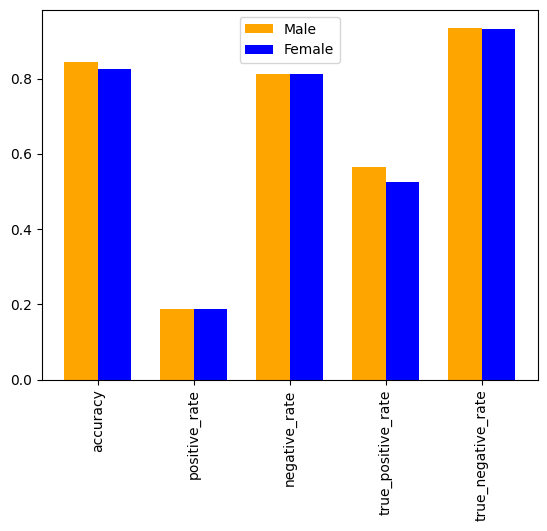

In [49]:
datav2_dummy = datav2.copy()
datav2_dummy['sex'] = 1 - datav2_dummy['sex']
augmented = pd.concat([datav2.copy(), datav2_dummy])
data_shuffled = augmented.sample(frac=1).reset_index(drop=True)
data_shuffled.dropna(inplace=True)
X = data_shuffled.drop(['salary'], axis=1)
y = data_shuffled['salary']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
predictor = SVC()
predictor.fit(x_train, y_train)
predictions=predictor.predict(x_test)
testdata = x_test.copy()
testdata['salary'] = y_test
testdata['pred'] = pd.Series(predictions, index=x_test.index)
testdata['accurate'] = (testdata['pred'] == testdata['salary'])
ctf_1 = evaluate_gender_performance(testdata)
model_summary("counterfactual_augmentation", "", ctf_1)

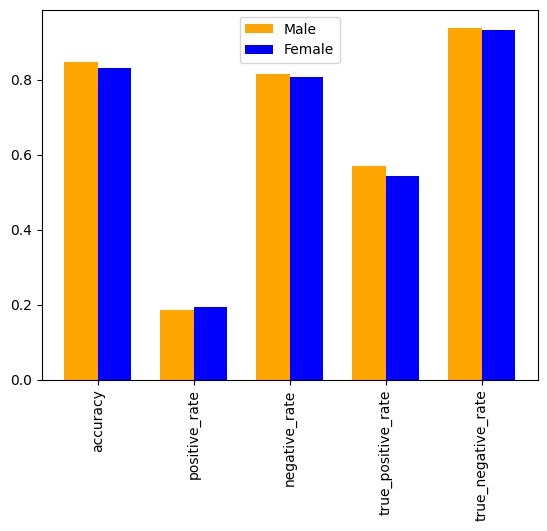

In [50]:
predictor = SVC()
predictor.fit(x_train.drop(['sex'], axis=1), y_train)
predictions=predictor.predict(x_test.drop(['sex'], axis=1))
testdata = x_test.copy()
testdata['salary'] = y_test
testdata['pred'] = pd.Series(predictions, index=x_test.index)
testdata['accurate'] = (testdata['pred'] == testdata['salary'])
ctf_blind = evaluate_gender_performance(testdata)
model_summary("counterfactual_augmentation_blind", "", ctf_blind)

#  Comparing bias mitigation approaches


In [64]:
def plot_comparisons(approach_names, accuracy_results, title, fignum=1, rotation='horizontal'):
    assert isinstance(accuracy_results, list) and not isinstance(accuracy_results[0], list), accuracy_results
    indices = list(range(len(approach_names)))
    colors = cm.rainbow(np.linspace(0, 1, len(indices)))
    plt.figure(fignum)

    for index in indices:
        plt.scatter(index, accuracy_results[index], color=colors[index])

    plt.xticks(indices, approach_names, rotation=rotation)

    plt.title(title)
    plt.show()

def plot_comparisons_groups(approaches, accuracy_results, title, fignum=1, rotation='horizontal', labels=["Male", "Female"]):

    assert isinstance(accuracy_results, list), "Accuracy results must be a list"


    indices = list(range(len(approaches)))
    colors = ['red', 'blue']
    fig, ax = plt.subplots()

    for index in indices:
        ax.scatter(index, accuracy_results[0][index], c=colors[0], label=labels[0] if labels and index ==0 else None)
        ax.scatter(index, accuracy_results[1][index], c=colors[1], label=labels[1] if labels and index ==0 else None)

    if labels:
        ax.legend()

    plt.xticks(indices, approaches, rotation=rotation)
    plt.title(title)

    plt.show()


In [65]:
approaches = ['no_debias',  'equal_|data|_per_gender', 'if_gender_blind', 'equal_data_per_(gender, category)', 'if_gender_blind' 'equal_data_ratio_per_gender', 'if_blind', 'ctf', 'ctf_blind']
summaries = [summary, approach_2, approach_2_blind, approach_3, approach_3_blind, approach_4, approach_4_blind, ctf_1, ctf_blind]

# Comparing overall accuracies

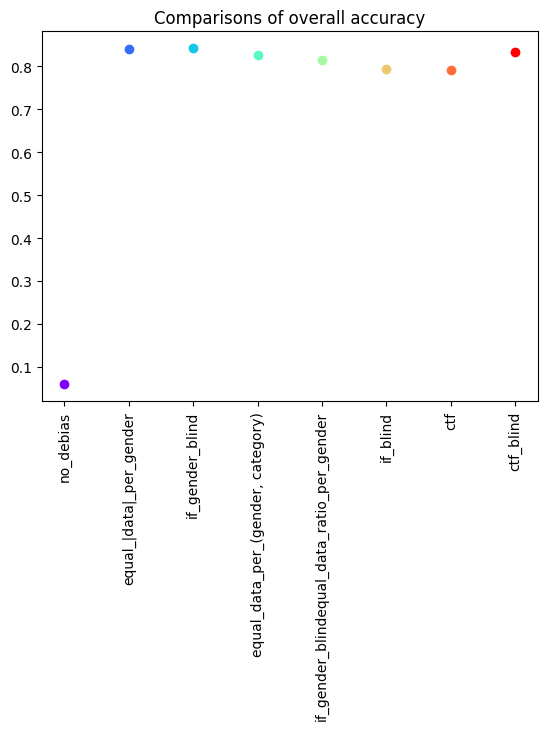

In [66]:

accuracy_results = [summary['accuracy_overall'] for summary in summaries]
plot_comparisons(approaches, accuracy_results, 'Comparisons of overall accuracy', rotation='vertical')

In [67]:
def plot_model_gender_metrics(_feature, _summaries, _modelNames, _title, rotation='vertical'):
    gender_metrics = [[summary[_feature+'_Male'] for summary in _summaries],
                         [summary[_feature+'_Female'] for summary in _summaries]
                        ]
    plot_comparisons_groups(_modelNames,gender_metrics, _title, rotation=rotation)


# Comparing overall accuracy accross gender

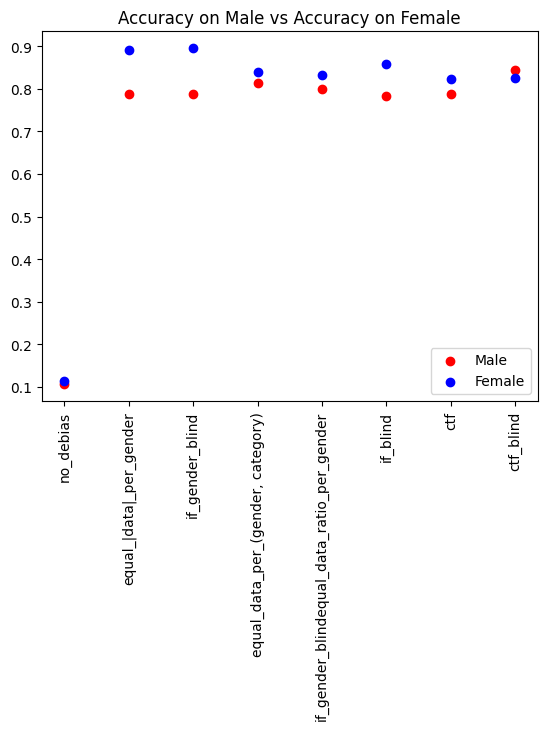

In [68]:
plot_model_gender_metrics('accuracy', summaries, approaches, "Accuracy on Male vs Accuracy on Female")

# Positive and negative rates accross gender

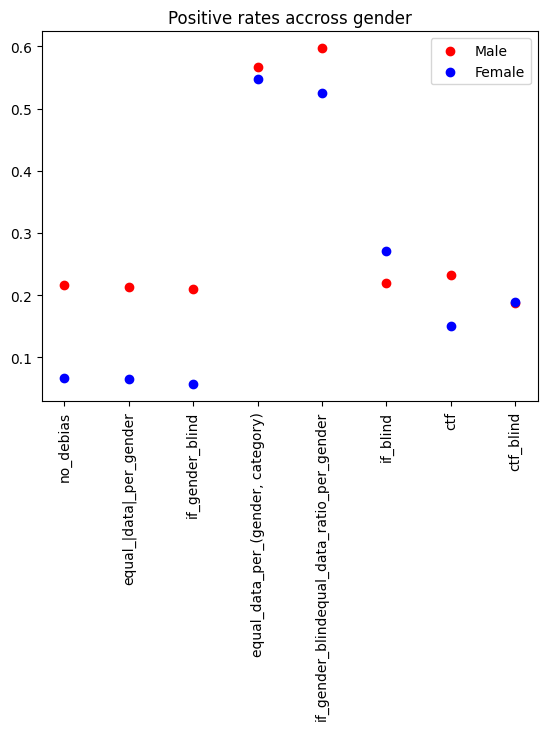

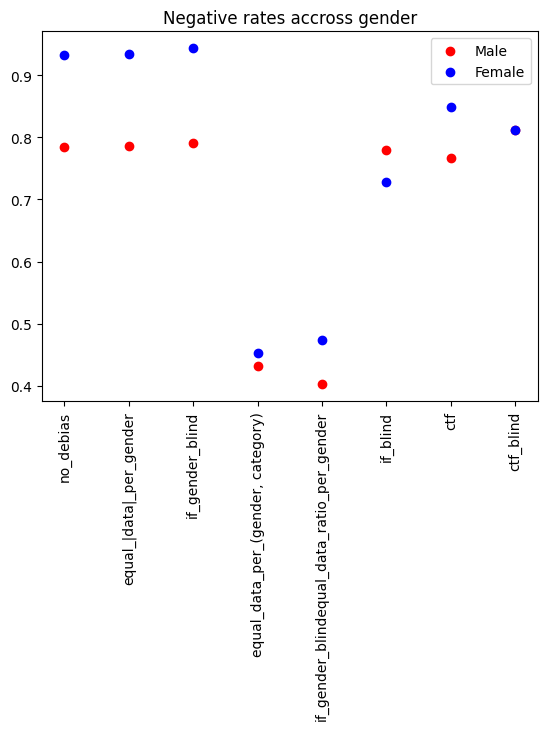

In [69]:
plot_model_gender_metrics('positive_rate', summaries, approaches, "Positive rates accross gender")
plot_model_gender_metrics('negative_rate', summaries, approaches, "Negative rates accross gender")

# True positive and True negative rates accross gender

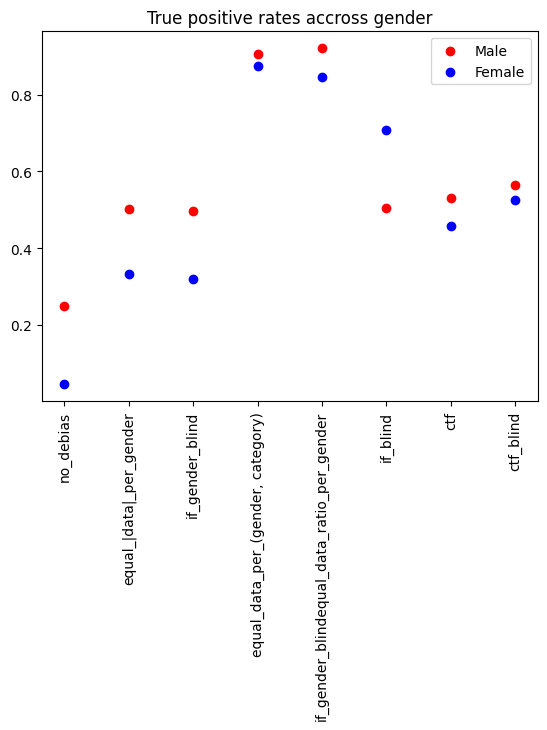

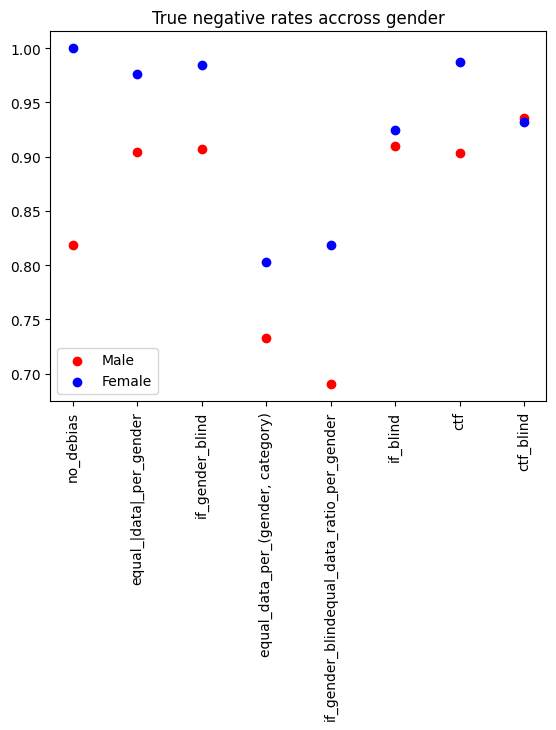

In [70]:
plot_model_gender_metrics('true_positive_rate', summaries, approaches, "True positive rates accross gender")
plot_model_gender_metrics('true_negative_rate', summaries, approaches, "True negative rates accross gender")